# Графики параметров усредненных по 5  дискам
(сравнение нескольких измерений системы)

* AV_CONFIG_ORIGIN -- оригинальные std
* AV_CONFIG_SAMPLE -- std средних значений

In [1]:
import json
import numpy as np
from collections import OrderedDict
from utils import NestedDictEncoder
from fio_parser_utils import save_json
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
CONFIGS = []
for i in range(8):
    path = 'packet_configs/fixed_disks_offset/packet_config_{}.json'.format(i)
    with open(path, 'r') as f:
        config = json.load(f, object_pairs_hook=OrderedDict)
    CONFIGS.append(config)
SIZES = [int(s[:-1]) for s in config]

### Усредненный config

In [3]:
encoder = NestedDictEncoder(CONFIGS[0])
encoder1 = NestedDictEncoder(CONFIGS[1])

values = np.array([encoder.encode(config) for config in CONFIGS])
n = len(values[0])
idx_mean = np.array(encoder.keys_list()) == 'mean'
idx_std = np.array(encoder.keys_list()) == 'std_dev'
assert idx_mean.shape[0] != 0
assert idx_std.shape[0] != 0
av_values_origin = np.array(encoder.encode(CONFIGS[0]))
av_values_sample = np.array(encoder1.encode(CONFIGS[1]))

av_values_origin[idx_mean] = np.mean(values[:,idx_mean], axis=0)
av_values_sample[idx_mean] = np.mean(values[:,idx_mean], axis=0)

av_values_origin[idx_std] = np.linalg.norm(values[:,idx_std], axis=0)
av_values_sample[idx_std] = np.std(values[:,idx_mean], axis=0)

AV_CONFIG_ORIGIN = encoder.decode(av_values_origin.copy())
AV_CONFIG_SAMPLE = encoder1.decode(av_values_sample.copy())


# save_json(AV_CONFIG_ORIGIN, 'packet_configs/FINAL_PACKET_CONFIG_ORIGIN.json')
# save_json(AV_CONFIG_SAMPLE, 'packet_configs/FINAL_PACKET_CONFIG_SAMPLE.json')

In [4]:
encoder = NestedDictEncoder(CONFIGS[0])

values = np.array([encoder.encode(config) for config in CONFIGS])
n = len(values[0])
idx_mean = np.array(encoder.keys_list()) == 'mean'
idx_std = np.array(encoder.keys_list()) == 'std_dev'

assert idx_mean.shape[0] != 0
assert idx_std.shape[0] != 0

av_values_origin = np.array(encoder.encode(CONFIGS[0]))
av_values_sample = np.array(encoder.encode(CONFIGS[0]))

av_values_origin[idx_mean] = np.mean(values[:,idx_mean], axis=0)
av_values_sample[idx_mean] = np.mean(values[:,idx_mean], axis=0)

av_values_origin[idx_std] = np.linalg.norm(values[:,idx_std], axis=0)
av_values_sample[idx_std] = np.std(values[:,idx_mean], axis=0)

assert (av_values_origin == av_values_sample).all() == False

AV_CONFIG_ORIGIN = encoder.decode(av_values_origin)
AV_CONFIG_SAMPLE = encoder.decode(av_values_sample)

assert AV_CONFIG_ORIGIN != AV_CONFIG_SAMPLE

# save_json(AV_CONFIG_ORIGIN, 'packet_configs/FINAL_PACKET_CONFIG_ORIGIN.json')
# save_json(AV_CONFIG_SAMPLE, 'packet_configs/FINAL_PACKET_CONFIG_SAMPLE.json')

In [5]:
(av_values_origin != av_values_sample).all()

False

In [6]:
def plot_common_params(param, configs, av_config=AV_CONFIG_ORIGIN):
    plt.figure(figsize=(6,4))
    for i, conf in enumerate(configs):
        mean = [v[param]['mean'] for v in conf.values()]
        plt.plot(SIZES, mean, label='config ' + str(i))
    mean = np.array([v[param]['mean'] for v in av_config.values()])
    std = np.array([v[param]['std_dev'] for v in av_config.values()])
    plt.plot(SIZES, mean, label='av_config',linewidth=3)
    plt.fill_between(SIZES, mean+std, mean-std, facecolor='blue', alpha=0.1, label='av_config_std')
    
    plt.legend()
    plt.grid()
    plt.xlabel('block size (KB)')
    plt.ylabel('seconds')
    plt.title('Fio results: ' + param)
    plt.legend(loc='upper left')
    plt.show()

In [7]:
def plot_rw_params(rw, param, configs, av_config=AV_CONFIG_ORIGIN):
    plt.figure(figsize=(6,4))
    for i, conf in enumerate(configs):
        mean = [v[rw][param]['mean'] for v in conf.values()]
        plt.plot(SIZES, mean, label='config ' + str(i))
    mean = np.array([v[rw][param]['mean'] for v in av_config.values()])    
    std = np.array([v[rw][param]['std_dev'] for v in av_config.values()])

    plt.plot(SIZES, mean, label='av_config',linewidth=3)
    plt.fill_between(SIZES, mean+std, mean-std, facecolor='blue', alpha=0.1, label='av_config_std')
        
    plt.legend()
    plt.grid()
    plt.xlabel('block size (KB)')
    plt.ylabel('seconds')
    title = 'Fio results: {} {}'.format(rw, param)
    plt.title(title)
    plt.legend(loc='upper left')
    plt.show()

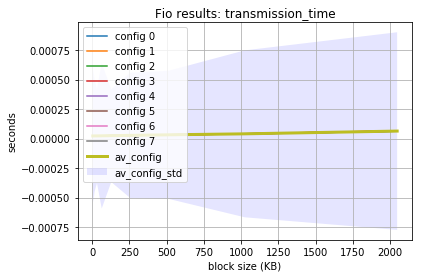

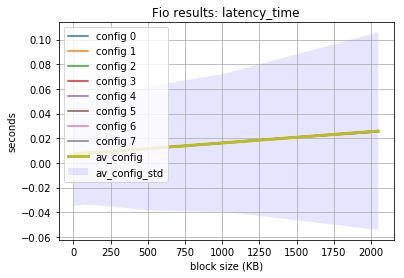

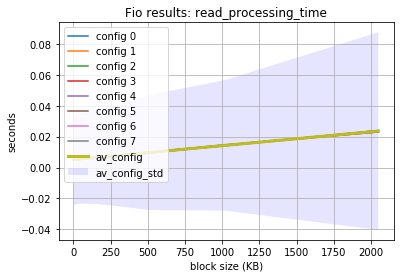

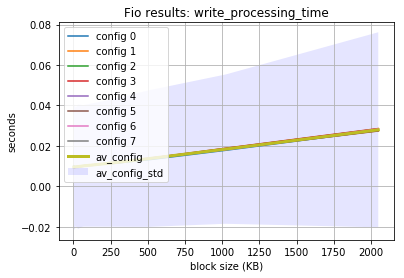

In [8]:
# common parameters

common_params_names = ['transmission_time', 'latency_time', 'read_processing_time', 'write_processing_time']

for param in common_params_names:
    plot_common_params(param, CONFIGS)

In [9]:
# read/write parameters
rw_params_names = ['rate_time', 'seek_time', 'overheads_time']

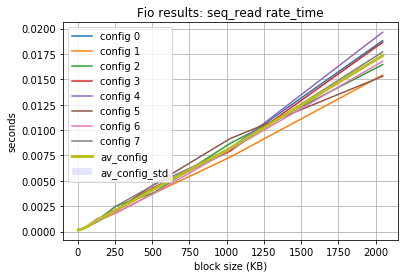

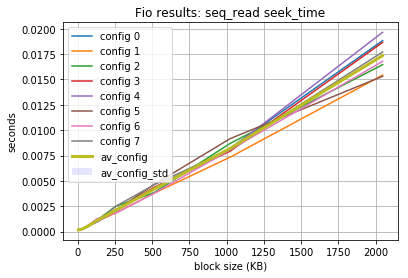

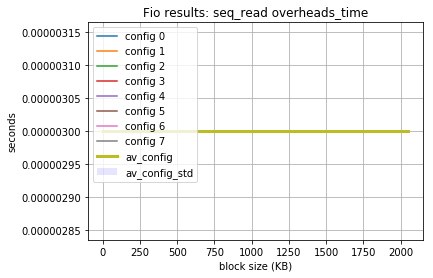

In [10]:
rw = 'seq_read'
for param in rw_params_names:
    plot_rw_params(rw, param, CONFIGS)

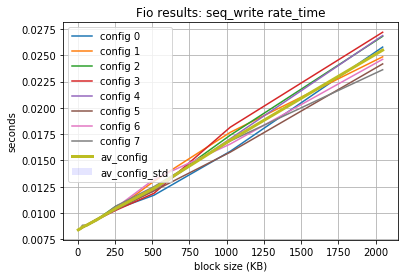

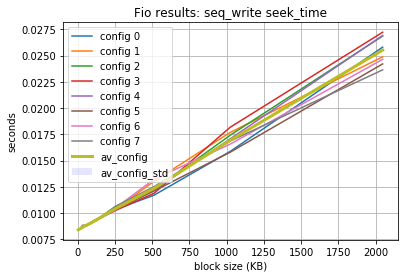

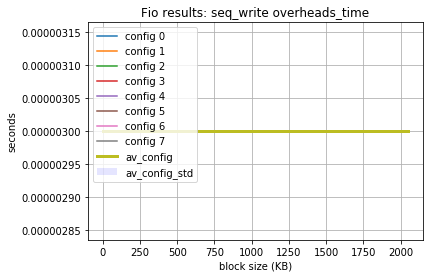

In [11]:
rw = 'seq_write'
for param in rw_params_names:
    plot_rw_params(rw, param, CONFIGS)

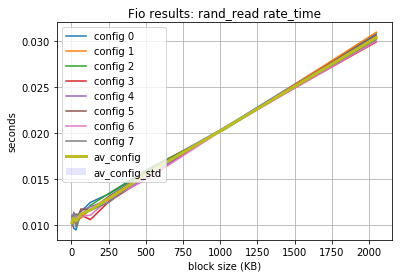

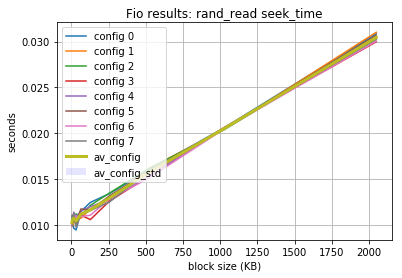

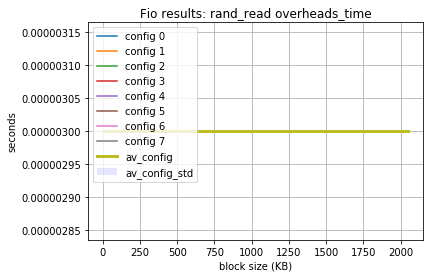

In [12]:
rw = 'rand_read'
for param in rw_params_names:
    plot_rw_params(rw, param, CONFIGS)

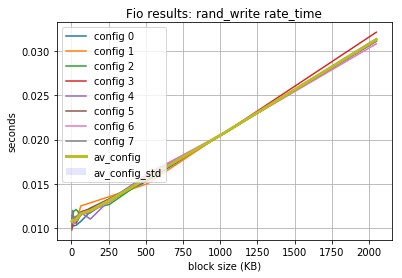

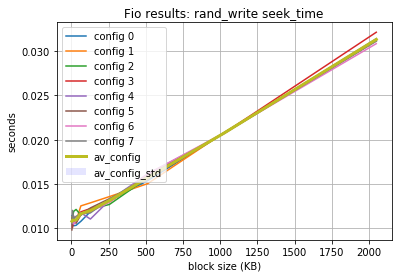

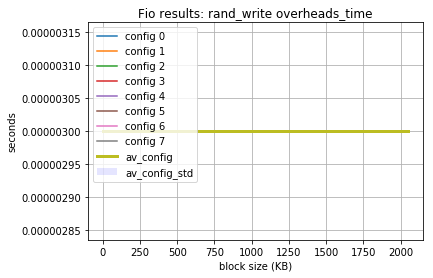

In [13]:
rw = 'rand_write'
for param in rw_params_names:
    plot_rw_params(rw, param, CONFIGS)

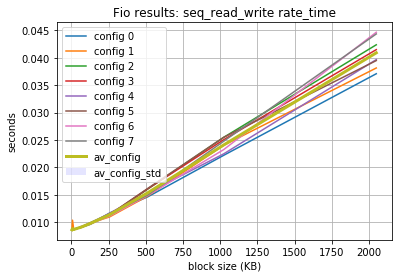

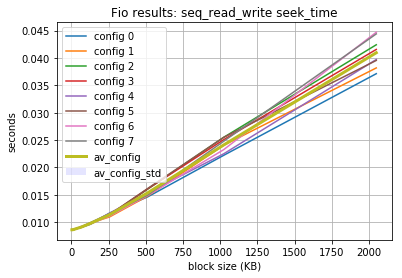

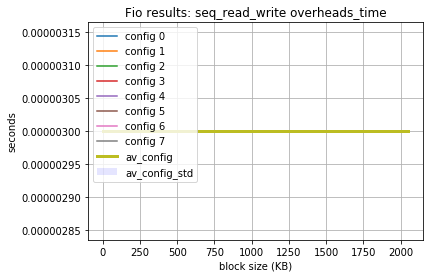

In [14]:
rw = 'seq_read_write'
for param in rw_params_names:
    plot_rw_params(rw, param, CONFIGS)

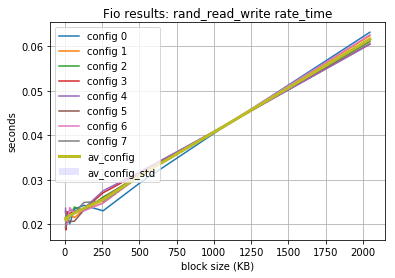

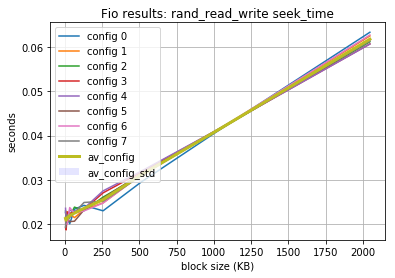

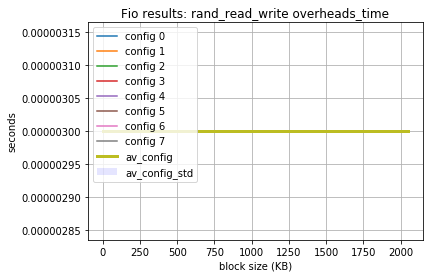

In [15]:
rw = 'rand_read_write'
for param in rw_params_names:
    plot_rw_params(rw, param, CONFIGS)